In [4]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'/home/rahul/Documents/TATAMOTORS.BO.csv')
#Insert your file_path above 
df.shape

(1231, 7)

In [6]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1221,2020-03-16,86.750000,87.650002,82.199997,82.949997,82.949997,3827222.0
1222,2020-03-17,82.699997,84.800003,77.500000,77.900002,77.900002,5206037.0
1223,2020-03-18,80.000000,80.500000,75.099998,75.500000,75.500000,3815807.0
1224,2020-03-19,70.599998,76.500000,68.800003,72.949997,72.949997,5387940.0
1225,2020-03-20,74.300003,79.550003,72.699997,77.400002,77.400002,4843183.0
1226,2020-03-23,71.000000,72.099998,69.699997,69.699997,69.699997,1526872.0
1227,2020-03-24,70.000000,71.199997,63.599998,68.599998,68.599998,2487156.0
1228,2020-03-25,68.900002,71.699997,67.099998,70.199997,70.199997,2611383.0
1229,2020-03-26,71.699997,73.500000,68.300003,70.800003,70.800003,2888342.0
1230,2020-03-27,71.050003,75.849998,69.400002,70.650002,70.650002,2962238.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1231 non-null   object 
 1   Open       1230 non-null   float64
 2   High       1230 non-null   float64
 3   Low        1230 non-null   float64
 4   Close      1230 non-null   float64
 5   Adj Close  1230 non-null   float64
 6   Volume     1230 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.4+ KB


In [8]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [9]:
df =df.dropna()

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

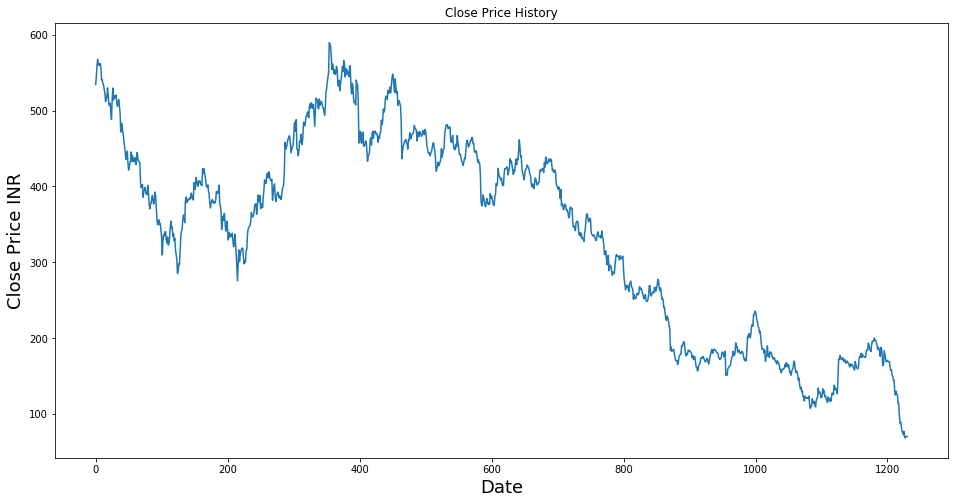

In [18]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [19]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

984

In [21]:
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.8941604 ],
       [0.91315989],
       [0.94089874],
       ...,
       [0.00307249],
       [0.00422469],
       [0.00393664]])

In [27]:
train_data = scaled_data[0:training_data_len,:]
train_data.shape
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [28]:
x_train ,y_train = np.array(x_train),np.array(y_train)

In [29]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(924, 60, 1)

In [78]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(50,return_sequences = False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

In [79]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [129]:
model.fit(x_train,y_train,epochs=20)

Train on 924 samples
Epoch 1/20
924/924 [==============================] - 2s 2ms/sample - loss: 9.4534e-04
Epoch 2/20
924/924 [==============================] - 2s 2ms/sample - loss: 8.8722e-04
Epoch 3/20
924/924 [==============================] - 2s 2ms/sample - loss: 8.5768e-04
Epoch 4/20
924/924 [==============================] - 2s 2ms/sample - loss: 8.6317e-04
Epoch 5/20
924/924 [==============================] - 2s 2ms/sample - loss: 8.6458e-04
Epoch 6/20
924/924 [==============================] - 2s 2ms/sample - loss: 8.0454e-04
Epoch 7/20
924/924 [==============================] - 2s 2ms/sample - loss: 9.3614e-04
Epoch 8/20
924/924 [==============================] - 2s 2ms/sample - loss: 7.8861e-04
Epoch 9/20
924/924 [==============================] - 2s 2ms/sample - loss: 7.6863e-04
Epoch 10/20
924/924 [==============================] - 2s 2ms/sample - loss: 8.8335e-04
Epoch 11/20
924/924 [==============================] - 2s 2ms/sample - loss: 9.7172e-04
Epoch 12/20
924/924 

In [130]:
test_data = scaled_data[training_data_len -60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [131]:
x_test = np.array(x_test)

In [132]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [133]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [134]:
df['Close'].describe()

count    1230.000000
mean      337.881532
std       131.573221
min        68.599998
25%       185.650005
50%       371.875000
75%       445.212501
max       589.349976
Name: Close, dtype: float64

In [135]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

10.490668914071072

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


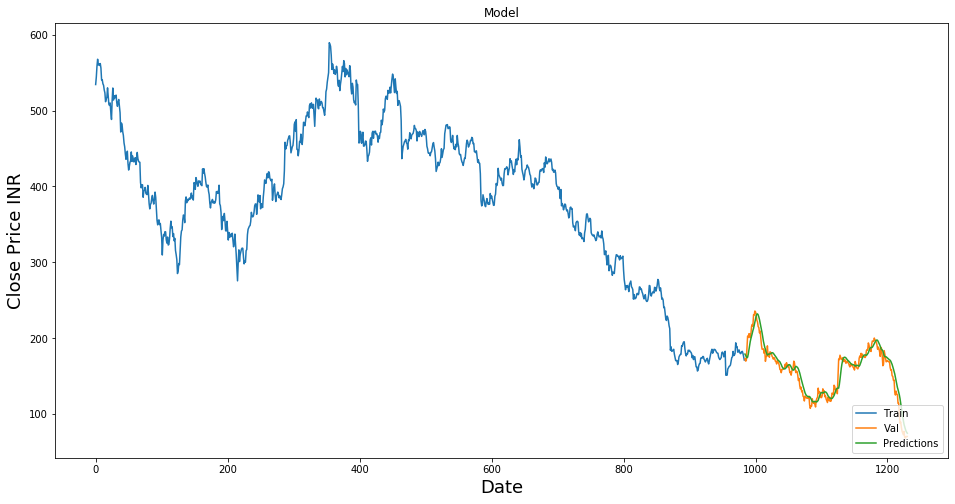

In [136]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [137]:
valid

,Close,Predictions
984,173.100006,179.182266
985,169.899994,177.548798
986,170.600006,175.751221
987,187.149994,174.189026
988,202.800003,175.040314
...,...,...
1226,69.699997,83.531700
1227,68.599998,80.580002
1228,70.199997,78.037079
1229,70.800003,76.182266


In [126]:
df1 = df
new_df = df.filter(['Close'])
last_60_days = new_df[-61:-1].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[76.86589]]


In [127]:
df1.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2020-03-27,71.050003,75.849998,69.400002,70.650002,70.650002,2962238.0


In [128]:
import pandas_datareader as web
real_data = web.DataReader('TATAMOTORS.BO',data_source ='yahoo',start='2020-3-27',end = '2020-3-27')
print(real_data['Close'])

Date
2020-03-27    70.650002
Name: Close, dtype: float64
